# Description 
- Nội dung: dữ liệu ghi lại thông tin các vụ phóng tên lửa từ năm 1957
- Nguồn: https://www.kaggle.com/agirlcoding/all-space-missions-from-1957
- Cách thức dữ liệu được lấy: dữ liệu được scrap từ trang https://nextspaceflight.com/launches/past/?page=1

# Import libraries

In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

# Import file

In [380]:
spaceLaunch_df = pd.read_csv("Space_Corrected.csv")
spaceLaunch_df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


# Explore

In [381]:
#Dữ liệu gồm 4324 dòng và 9 cột
spaceLaunch_df.shape

(4324, 9)

In [382]:
# 9 cột tương ứng là 'Unnamed: 0','Unnamed: 0.1','Company Name','Location','Datum','Detail','Status Rocket',' Rocket','Status Mission'
spaceLaunch_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')

In [383]:
#Kiểu dữ liệu của các trường
spaceLaunch_df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
Company Name      object
Location          object
Datum             object
Detail            object
Status Rocket     object
 Rocket           object
Status Mission    object
dtype: object

In [384]:
#Tỉ lệ giá trị rỗng trong từng cột
for column in spaceLaunch_df.columns:
    print(column, str(round( 100* spaceLaunch_df[column].isnull().sum() / len(spaceLaunch_df[column]),2)) + '%')

Unnamed: 0 0.0%
Unnamed: 0.1 0.0%
Company Name 0.0%
Location 0.0%
Datum 0.0%
Detail 0.0%
Status Rocket 0.0%
 Rocket 77.71%
Status Mission 0.0%


## Ý nghĩa các cột dữ liệu
- Unnamed: 0,Unnamed: 0.1: (int) trường index
- Company Name: (int) tên của công ty thực hiện vụ phóng
- Location: (object) địa điểm xảy ra vụ phóng
- Datum: (object) Thời điểm vụ phóng xả ra
- Detail: (object) Phân lớp/Tên của loại tên lửa
- Status Rocket: (object) Tình trạng của tên lửa (đang còn sử dụng/không còn sử dụng)
- Rocket: (object) Chi phí cho tên lửa
- Status Mission: (object) Kết quả của vụ phóng
    

In [385]:
# Xác định các kiểu dữ liệu có thể có của object
def open_object_dtype(s):
    dtypes = set()
    
    # YOUR CODE HERE
    for i in range(len(s)):
        dtypes.add(type(s.iloc[i]))
    
    return dtypes

In [386]:
# Company Name: (object) tên của công ty thực hiện vụ phóng (56 công ty)
print(len(spaceLaunch_df["Company Name"].unique()))
open_object_dtype(spaceLaunch_df["Location"])

56


{str}

In [387]:
# Location: (object) địa điểm xảy ra vụ phóng (137 địa điểm)
print(len(spaceLaunch_df["Location"].unique()))
open_object_dtype(spaceLaunch_df["Location"])

137


{str}

In [388]:
# Datum: (object) Thời điểm vụ phóng xả ra 
open_object_dtype(spaceLaunch_df["Datum"])

{str}

In [389]:
# Detail: (object) Phân lớp/Tên của loại tên lửa (4278 giá trị phân biệt)
print(len(spaceLaunch_df["Detail"].unique()))
open_object_dtype(spaceLaunch_df["Detail"])

4278


{str}

In [390]:
# Status Rocket: (object) Tình trạng của tên lửa (đang còn sử dụng/không còn sử dụng)
print(len(spaceLaunch_df["Status Rocket"].unique()))
open_object_dtype(spaceLaunch_df["Status Rocket"])

2


{str}

In [391]:
# Rocket: (object) Chi phí cho tên lửa
open_object_dtype(spaceLaunch_df[" Rocket"])

{float, str}

In [392]:
# Status Mission: (object) Kết quả của vụ phóng (Success/Failure/Prelaunch Failure/Partial Failure)
spaceLaunch_df["Status Mission"].unique()
open_object_dtype(spaceLaunch_df["Status Mission"])

{str}

# Data Preprocessing

In [393]:
#Bỏ đi 2 cột Unnamed: 0 và Unnamed: 0.1 vì không cần thiết
del spaceLaunch_df["Unnamed: 0"]
del spaceLaunch_df["Unnamed: 0.1"]

In [394]:
#Tên cột Rocket bị dư một dấu cách phía trước, không để ý có thể gây lỗi nên cần được bỏ dấu cách đi
spaceLaunch_df = spaceLaunch_df.rename(columns= {" Rocket" : "Rocket"})

#Convert cột rocket sang kiểu Float và lấp những giá trị null bằng 0
spaceLaunch_df["Rocket"] = spaceLaunch_df["Rocket"].astype(str)
for i in range(len(spaceLaunch_df["Rocket"])):
    spaceLaunch_df["Rocket"][i] = spaceLaunch_df["Rocket"][i].strip(", ")
    spaceLaunch_df["Rocket"][i] = spaceLaunch_df["Rocket"][i].replace(",","")
spaceLaunch_df["Rocket"] = spaceLaunch_df["Rocket"].astype(float)
spaceLaunch_df["Rocket"] = spaceLaunch_df["Rocket"].fillna(0)

In [395]:
#Cột Datum là kiểu dữ liệu object cần được chuyển sang dạng datetime
spaceLaunch_df["Datum"] = pd.to_datetime(spaceLaunch_df["Datum"])

#Tạo thêm cột month, year
spaceLaunch_df["year"] = spaceLaunch_df["Datum"].apply(lambda datetime: datetime.year)
spaceLaunch_df["month"] = spaceLaunch_df["Datum"].apply(lambda datetime: datetime.month)

#Tạo thêm cột country
spaceLaunch_df["country"] = spaceLaunch_df["Location"].apply(lambda country: country.split(", ")[-1])

In [396]:
#Các nhiệm vụ phóng được thực hiện tại Kazakhstan đều được thực hiện bởi các công ty Nga
#nên ta cần đổi giá trị của cột country mà là Kazakhstan thành Russia mà trước năm 1991 là Liên Xô (USSR)
for i in range(len(spaceLaunch_df["country"])):
    if (spaceLaunch_df["country"].loc[i] == "Kazakhstan"):
        if(spaceLaunch_df["year"].loc[i] < 1991):
            spaceLaunch_df["country"].loc[i] = "USSR"
        else:
            spaceLaunch_df["country"].loc[i] = "Russia"
    # Một vài đại điểm phóng tại Nga trước năm 1991 vẫn lưu là Nga nên ta đổi thành USSR
    if (spaceLaunch_df["country"].loc[i] == "Russia" and spaceLaunch_df["year"].loc[i] < 1991):
        spaceLaunch_df["country"].loc[i] = "USSR"

#Tương tự với một số địa điểm khác trên thế giới
spaceLaunch_df.loc[spaceLaunch_df['country'] == 'New Mexico', 'country'] = 'USA'
spaceLaunch_df.loc[spaceLaunch_df['country'] == "Yellow Sea", 'country'] = "China"
spaceLaunch_df.loc[spaceLaunch_df['country'] == "Shahrud Missile Test Site", 'country'] = "Iran"
spaceLaunch_df.loc[spaceLaunch_df['country'] == "Pacific Missile Range Facility", 'country'] = "USA"
spaceLaunch_df.loc[spaceLaunch_df['country'] == "Barents Sea", 'country'] = 'Russia'
spaceLaunch_df.loc[spaceLaunch_df['country'] == "Gran Canaria", 'country'] = 'USA'

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Dữ liệu sau tiền xử lý

In [397]:
spaceLaunch_df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,year,month,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,8,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,8,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,2020,8,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,7,Russia
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,7,USA
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,1958,2,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,0.00,Success,1958,2,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,1957,12,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,1957,11,USSR


In [398]:
spaceLaunch_df.dtypes

Company Name       object
Location           object
Datum              object
Detail             object
Status Rocket      object
Rocket            float64
Status Mission     object
year                int64
month               int64
country            object
dtype: object

# Analysis

## Question 1

In [ ]:
space_company_5_df = spaceLaunch_df[spaceLaunch_df["Year"] > 2015]
space_company_5_df = space_company_5_df[~np.isnan(space_company_5_df["Rocket"])]

company_success_launch_df = space_company_5_df[space_company_5_df["Status Mission"] == "Success"].groupby(["Year","Company Name"])["Status Mission"].count().sort_values(ascending = False) 
company_launch_df = space_company_5_df.groupby("Year","Company Name")["Status Mission"].count().sort_values(ascending = False)

company_success_launch_ratio_df = company_success_launch_df.div(company_launch_df).reset_index()
company_success_launch_ratio_df = company_success_launch_ratio_df.rename(columns= {"Status Mission" : "Success Ratio"})
company_success_launch_ratio_df = company_success_launch_ratio_df.fillna(0)#.sort_values(by = "Success Ratio")
company_success_launch_ratio_df["Launch"] = np.zeros(len(company_success_launch_ratio_df["Company Name"]))
company_success_launch_ratio_df["Success"] = np.zeros(len(company_success_launch_ratio_df["Company Name"]))

for i in range(len(company_success_launch_ratio_df["Company Name"])):
    company_success_launch_ratio_df.loc[i,"Launch"] = company_launch_df[company_success_launch_ratio_df["Company Name"][i]]
    if(company_success_launch_ratio_df["Success Ratio"][i] != 0):
        company_success_launch_ratio_df.loc[i,"Success"] = company_success_launch_df[company_success_launch_ratio_df["Company Name"][i]]
    else:
        company_success_launch_ratio_df.loc[i,"Success"] = 0
company_success_launch_ratio_df.sort_values(by = "Launch").tail(10)


In [ ]:
space_company_5_df = spaceLaunch_df[spaceLaunch_df["year"] > 2015]
space_company_5_df = space_company_5_df[~np.isnan(space_company_5_df["Rocket"])]

company_success_launch_df = space_company_5_df[space_company_5_df["Status Mission"] == "Success"].groupby(["year","Company Name"])["Status Mission"].count()
company_launch_df = space_company_5_df.groupby(["year","Company Name"])["Status Mission"].count()
company_launch_df

### -----------------------------------------

In [407]:
active_df = spaceLaunch_df[spaceLaunch_df["Status Rocket"] == "StatusActive"]
active_df = active_df.groupby("country")["Status Rocket"].count().sort_values()
active_df

country
Brazil             3
North Korea        3
Israel             5
Iran              10
New Zealand       13
Pacific Ocean     36
Japan             38
India             50
Russia            80
France           113
USA              215
China            224
Name: Status Rocket, dtype: int64

## Question 2: Nước nào hiện đang dẫn đầu trong cuộc đua lên vũ trụ? 
Ý nghĩa: sau khi ta trả lời câu hỏi trên ta sẽ thấy được sự vươn lên mạnh mẽ của Trung Quốc trong ngành công nghiệp hàng không vũ trụ rồi từ đó có thể mở rộng ra các lĩnh vực khác để có cái nhìn bao quát hơn về sự phát triển của Trung Quốc. Đó sẽ là thông tin, bài học quý giá cho Việt Nam chúng ta bởi vì biết người biết ta, trăm trận trăm thắng.

In [368]:
launchCountry = spaceLaunch_df.groupby(["year","country"])["Status Mission"].count()
launchCountry = launchCountry.reset_index().sort_values(["year","Status Mission"],ascending = False)
launchCountry = pd.concat([group[1].head(1) for group in launchCountry.groupby(['year'])])

#Biểu đồ các nước dẫn đầu trong cuộc đua lên vũ trụ qua từng năm theo số vụ phóng
fig = px.bar(launchCountry, x="year", y="Status Mission", color='country')
fig.show()

Từ biểu đồ này ta có thể thấy trước 2017 gần như là Mỹ và Nga thay nhau đứng đầu về số lượng nhiệm vụ ra ngoài không gian, nhưng 3 năm gần đây thì Trung Quốc lại nổi lên một cách mạnh mẽ vượt qua 2 cường quốc kia dù là nước đi sau trong cuộc đua không gian này, liệu ta có thể hiểu thêm bằng cách phân tích cuộc đua của các công ty qua các năm?

In [319]:
spaceLaunch_China_df = spaceLaunch_df[spaceLaunch_df["country"] == "China"]
spaceLaunch_China_df.groupby(["Company Name"])["Status Mission"].count()

Company Name
CASC         250
CASIC          5
ExPace        10
Landspace      1
OneSpace       1
i-Space        1
Name: Status Mission, dtype: int64

CASC là một công ty nhà nước của Trung Quốc về khoa học hàng không vũ trụ, ta xem xét thử sự phát triển của công ty này

<BarContainer object of 47 artists>

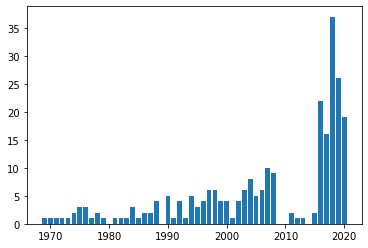

In [334]:
CASC = spaceLaunch_China_df[spaceLaunch_China_df["Company Name"] == "CASC"]
# launchCompany_China = pd.concat([group[1].head(1) for group in launchCompany_China.groupby(['year'])])
CASC = CASC.groupby("year")["Status Mission"].count().reset_index()
plt.bar(CASC["year"],CASC["Status Mission"])

Nếu kết hợp với việc tìm kiếm thông tin trên google về sự phát triển của khoa học công nghệ ở Trung Quốc thì cũng thấy có sự tương đồng về thời điểm khi năm 2016 cũng là năm Trung Quốc vượt mặt Mỹ và là nước có sống lượng bài báo khoa học được công bố nhiều nhất trên thế giới và là năm Trung Quốc thông qua luật an ninh mạng quốc gia yêu cầu mọi công ty nước ngoài làm ăn tại Trung Quốc phải lưu ít nhất 6 tháng dữ liệu ngay bên trong Trung Quốc. Cho thấy Trung Quốc có tham vọng rất to lớn kiểm soát thông tin tron nước và trở thành một cường quốc công nghệ trên thế giới, mặt khác số lượng tên lửa được phóng ra ngoài không gian tăng vọt có thể liên quan đến sự phát triển, áp dụng rộng rãi của công nghệ trí tuệ nhân tạo, nhận diện khuôn mặt và hệ thống giám sát, chấm điểm công dân của Trung Quốc, gây ra nhiều tranh cãi trong cộng đồng quốc tế.

In [358]:
detail_CASC = spaceLaunch_China_df[spaceLaunch_China_df["Company Name"] == "CASC"]
detail_CASC["Prototype"] = detail_CASC.loc[:,"Detail"].apply(lambda prototype: str(prototype.split(" | ")[0]))
detail_CASC["Prototype"].unique()

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['Long March 2D', 'Long March 4B', 'Long March 5',
       'Long March 3B/E', 'Long March 2C', 'Long March 11',
       'Long March 5B', 'Long March 7A', 'Long March 3B/YZ-1',
       'Long March 4C', 'Long March 6', 'Jielong-1', 'Long March 3C/E',
       'Long March 2D/YZ-3', 'Long March 3A', 'Long March 7/YZ-1A',
       'Long March 5/YZ-2', 'Long March 2F/G', 'Long March 2F/T',
       'Long March 3C/YZ-1', 'Long March 2C/SMA', 'Long March 3B',
       'Long March 3C', 'Long March 2F', 'Long March 3', 'Long March 2E',
       'Long March 4A', 'Feng Bao 1', 'Long March 2', 'Long March 1'],
      dtype=object)

## Question 3: Liệu ngành công nghiệp dịch vụ du lịch trong vũ trụ có khả thi?